<a href="https://colab.research.google.com/github/VHP2305/Regression-Capstone/blob/main/Public_Trasport_demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Transport Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name    -** Vishal Patel


# **Project Summary -**

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

# **GitHub Link -**

https://github.com/VHP2305/Regression-Capstone

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

# ***Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the dataset      
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Module/Regression Capstone Project/train_revised.csv')


In [4]:
#first 5 values
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


### Dataset First View

In [5]:
# Dataset First Look
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
dataset.shape


(51645, 10)

### Dataset Information

In [7]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
dataset.isna().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

# ***Understanding Your Variables***

In [10]:
#change datatype of ride_id and max_capacity from int to object because it is also a nominal categorial data and we want their categorical description.
dataset[["ride_id","max_capacity"]]=dataset[["ride_id","max_capacity"]].astype(str)

In [11]:
# Dataset Describe
dataset.describe(include='all')

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,51645,51645,51645,51645,51645,51645,51645,51645,51645,51645
unique,6249,61,2,51645,149,78,17,1,2,2
top,8454,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus,49
freq,50,2065,51532,1,856,3926,22607,51645,31985,31985


##**Summary:-**
1. In Ride_id, there are 6249 unique values.

2. There are total 61 unique seats in this dataset.

3. Travelers have used 2 types of payment method and most of the people(i.e. 51532 out of 51645) have used Mpesa to pay for their ticket.

4.  The record of 149 days is present in this dataset.

5. In travel_time, there are 78 unique time.

6. There are 17 towns where rides are originated and 22607 rides are only originated from Kisii.

7. There are 2 type of cars and most of them(31985 out of 51645) are bus.

8. There are 2 Maximum seat capacity and most of them have 49 seat capacity and frequency of 49 seat capacity is equal to frequency of bus, Thus we say that Bus have 49 seat capacity.









### Variables Description 

In [12]:
#get columns of the dataset
column = dataset.columns
column

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [13]:
#finding the relation between car_type and max_capacity
dataset.groupby(['car_type','max_capacity'])['max_capacity'].count()  #.unstack()

car_type  max_capacity
Bus       49              31985
shuttle   11              19660
Name: max_capacity, dtype: int64

We conclude that bus has 49 seat capacity and shuttle has 11 seat capacity.

In [14]:
#finding the relation between car_type and travel_from
dataset.groupby(['travel_from','car_type'])['car_type'].count().unstack()

car_type,Bus,shuttle
travel_from,,
Awendo,1788.0,NaN
Homa Bay,6304.0,NaN
Kehancha,1909.0,NaN
Kendu Bay,1.0,NaN
Keroka,341.0,647.0
Keumbu,3.0,19.0
Kijauri,408.0,623.0
Kisii,4236.0,18371.0
Mbita,378.0,NaN


as we see that, Shuttle only used for travel from Keroka, Keumbu, Kijauri and Kisii town, whereas bus used for travel from all the town.

# ***Find Traget Variable***

Since we are not given the target variable so we need to find target variable first.

There might be many ways of finding the target variable but here I am using one way that is I will find the count of each ride_id and that will be the number_of_ticket, this will be our target variable.


In [15]:
#apply groupby on ride_id to get number of ticket
target_df=dataset.groupby(["ride_id"]).seat_number.count().sort_values(ascending=False).rename("number_of_ticket").reset_index()
target_df.head()

,ride_id,number_of_ticket
0,8454,50
1,10834,49
2,8090,49
3,11382,49
4,13211,49


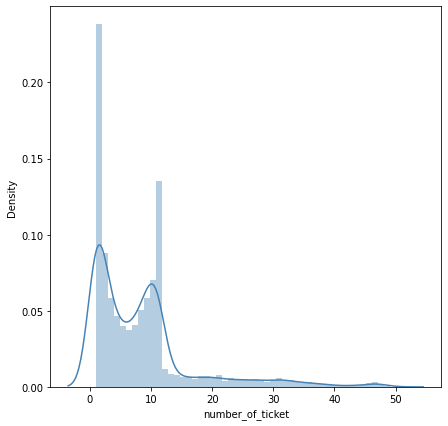

In [16]:
plt.figure(figsize=(7,7))
sns.distplot(target_df['number_of_ticket'], color='steelblue')
plt.show()


In [17]:
#drop duplicates
dataset1=dataset.drop_duplicates("ride_id")

In [18]:
dataset1.shape

(6249, 10)

In [19]:
#merge target variable and independent variable on the basis of ride_id
dataset2 = dataset1.merge(target_df, how="left",on="ride_id")
dataset2.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


Now we have found our final dataset so let us remove some features that doesn't seem to be important for predicting the number of tickets in our model



In [20]:
#remove ineffectual columns
dataset2 = dataset2.drop(['seat_number','payment_receipt'], axis=1)

In [21]:
dataset2.head()

,ride_id,payment_method,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,Mpesa,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,Mpesa,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,Mpesa,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,Mpesa,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,Mpesa,27-11-17,7:12,Migori,Nairobi,Bus,49,31


## 3. ***Data Wrangling***


##**Removing Constant Features**

We need to first remove the constant features.

In [22]:
#travel_to is a constant features because it takes only 1 values (i.e., Nairobi)
dataset2.drop(["travel_to"],axis=1,inplace=True)

##**Feature Engineering**

In [23]:
#combine travel date and travel time column and make a new feature called date.
dataset2["date"]=dataset2["travel_date"]+ " "+ dataset2["travel_time"]

In [24]:
#define a function based on time features
def  time_features(df): 

  '''This function takes dataframe as an argument and extracts the
  different features from the date variable of the dataset and finaly returns the updated 
  dataset'''
  
  df["date"]=pd.to_datetime(df["date"])
  df["day_of_week"]=df["date"].dt.dayofweek
  df["day_of_year"]=df["date"].dt.dayofyear
  df["day_of_month"]=df["date"].dt.day
  df["hour"]=df["date"].dt.hour
  df["minute"]=df["date"].dt.minute
  df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [6,7] else 0 )
  df["year"]=df["date"].dt.year
  df["quarter"]=df["date"].dt.quarter
  df["month"]=df["date"].dt.month
  return df

In [25]:
#call the function 
dataset_new = time_features(dataset2)

In [26]:
#new dataframw with addition of time features
dataset_new.head()

,ride_id,payment_method,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,hour,minute,is_weekend,year,quarter,month
0,1442,Mpesa,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,7,15,0,2017,4,10
1,5437,Mpesa,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,7,12,1,2017,4,11
2,5710,Mpesa,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,7,5,1,2017,4,11
3,5777,Mpesa,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,7,10,0,2017,4,11
4,5778,Mpesa,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,7,12,0,2017,4,11


In [27]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6248
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ride_id           6249 non-null   object        
 1   payment_method    6249 non-null   object        
 2   travel_date       6249 non-null   object        
 3   travel_time       6249 non-null   object        
 4   travel_from       6249 non-null   object        
 5   car_type          6249 non-null   object        
 6   max_capacity      6249 non-null   object        
 7   number_of_ticket  6249 non-null   int64         
 8   date              6249 non-null   datetime64[ns]
 9   day_of_week       6249 non-null   int64         
 10  day_of_year       6249 non-null   int64         
 11  day_of_month      6249 non-null   int64         
 12  hour              6249 non-null   int64         
 13  minute            6249 non-null   int64         
 14  is_weekend        6249 n

In [28]:
dataset_new.drop_duplicates()

,ride_id,payment_method,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,hour,minute,is_weekend,year,quarter,month
0,1442,Mpesa,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,7,15,0,2017,4,10
1,5437,Mpesa,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,7,12,1,2017,4,11
2,5710,Mpesa,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,7,5,1,2017,4,11
3,5777,Mpesa,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,7,10,0,2017,4,11
4,5778,Mpesa,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,7,12,0,2017,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244,13812,Mpesa,20-04-18,23:10,Ndhiwa,Bus,49,11,2018-04-20 23:10:00,4,110,20,23,10,0,2018,2,4
6245,13813,Mpesa,20-04-18,7:05,Ndhiwa,Bus,49,11,2018-04-20 07:05:00,4,110,20,7,5,0,2018,2,4
6246,13825,Mpesa,20-04-18,7:09,Rongo,Bus,49,1,2018-04-20 07:09:00,4,110,20,7,9,0,2018,2,4
6247,13826,Mpesa,20-04-18,8:00,Awendo,Bus,49,1,2018-04-20 08:00:00,4,110,20,8,0,0,2018,2,4


In [29]:
#for particular car type
dataset_bus=dataset_new[dataset_new["car_type"]=="Bus"]
dataset_shuttle=dataset_new[dataset_new["car_type"]=="shuttle"]

In [30]:
#tuple
datasets=(dataset_bus,dataset_shuttle)


In [31]:
#car_type value
dataset_new["car_type"].unique()

array(['Bus', 'shuttle'], dtype=object)

Answer Here.

# ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## ***Univariate Analysis***

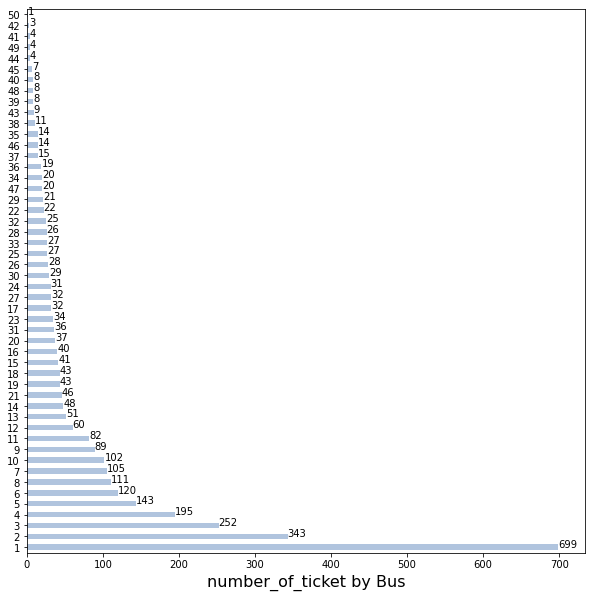

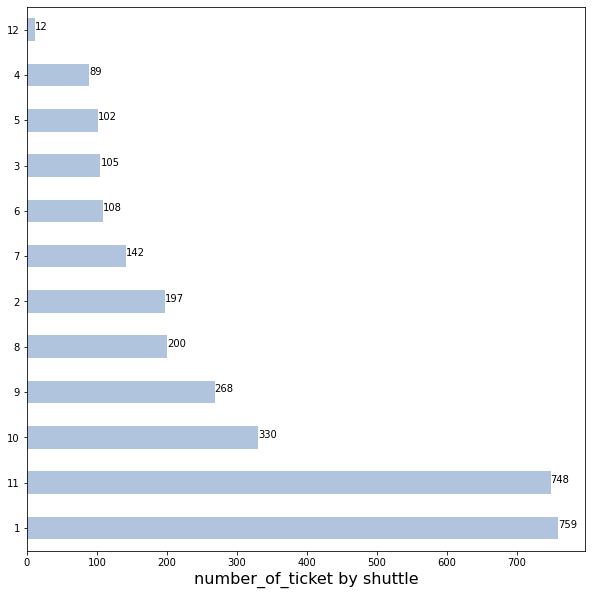

In [32]:
#countplot for both number of ticket when travel is done by bus and by shuttle
for d,car in zip(datasets,dataset_new["car_type"].unique()):
  y=d["number_of_ticket"].value_counts().reset_index()["number_of_ticket"]
  #barplot 
  plt.figure(figsize=(10,10))
  d["number_of_ticket"].value_counts().plot(kind='barh',color="lightsteelblue") #,color="thistle")
  for index, value in enumerate(y):
    plt.text(value, index, str(value))
  plt.xlabel("number_of_ticket by " + car, fontsize=16)
  plt.show()

**Summary:**

By Bus, Number of ticket 1 is most frequent with value 699.

By shuttle, Number of ticket 1 and 11 are most frequent with values 759 and 748 respectively.



In [33]:
#let's check for a particular number of ticket 50 which has frequency 1 i.e., 50 people are travel from the particular vehicle on a specific route on a specific day and time.
dataset_new[dataset_new["number_of_ticket"]==50]

,ride_id,payment_method,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,hour,minute,is_weekend,year,quarter,month
1924,8454,Mpesa,09-01-18,7:00,Sirare,Bus,49,50,2018-09-01 07:00:00,5,244,1,7,0,0,2018,3,9


Highest number of tickets is 50, in bus to travel from Sirare to Nairobi at 7:00 A.M. on 09-01-18 and payment is done using Mpesa.

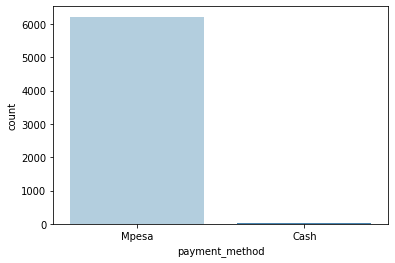

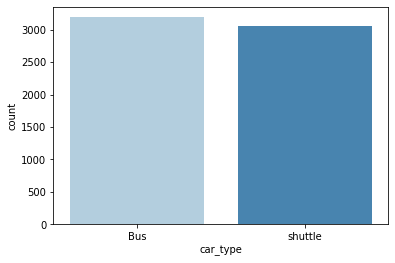

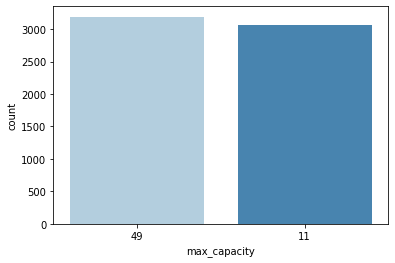

In [34]:
plot_count_cols = ['payment_method','car_type','max_capacity']
for plots in plot_count_cols:
  sns.countplot(dataset_new[plots],palette = "Blues")
  plt.show()

Mpesa is used mostly in Payment mode type, i.e., cash is less prefered by the people who travel to Nairobi.

Mostly people travel by a bus (i.e. with maximum capacity 49) as compare to shuttle (whose maximum capacity is 11).



In [35]:
#function for plotting countplot with values on their top.
def countplot_values(feature):
  y=dataset_new[feature].value_counts().reset_index()[feature]
  #barplot 
  # plt.figure(figsize=(10,10))
  dataset_new[feature].value_counts().plot(kind='barh',color="steelblue")
  for index, value in enumerate(y):
    plt.text(value, index, str(value))
  plt.show()
  return feature

**Payment Method**

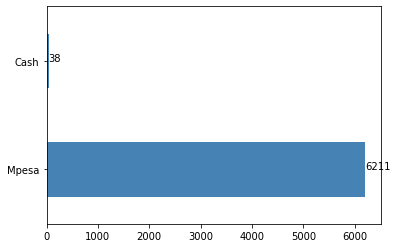

'payment_method'

In [36]:
countplot_values("payment_method")

Mpesa is used mostly in Payment mode type, i.e., cash is less prefered by the people who travel to Nairobi.

**Car Type**

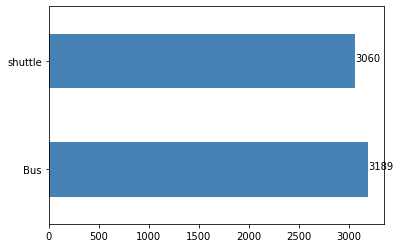

'car_type'

In [37]:
countplot_values("car_type")

Mostly people travel by a bus (i.e. with maximum capacity 49) as compare to shuttle (whose maximum capacity is 11).

**Travel Time**

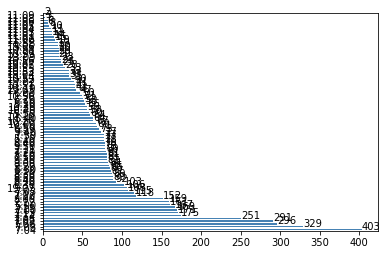

'travel_time'

In [38]:
countplot_values('travel_time')

Most prefer time for travel to Nairobi is 7:04 A.M., 7:08 A.M. and 7:06 A.M. because most vehicle are began at 7:04 A.M., 7:08 A.M. and 7:06 A.M. for travel to Nairobi.

**Travel From**

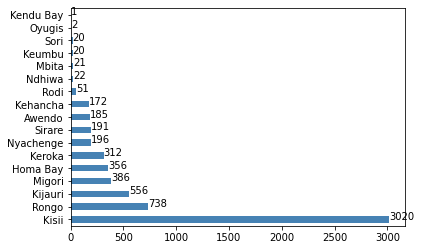

'travel_from'

In [39]:
countplot_values('travel_from')

Mostly vehicle are originated from Kisii, Rongo and Kijauri.

**Year**

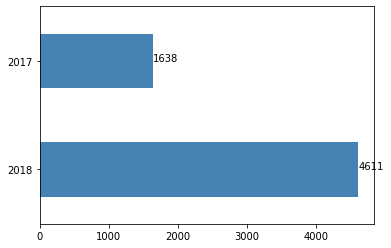

'year'

In [40]:
countplot_values('year')

This dataset contains data of 2 year.(i.e. 2017 and 2018)

**Quarter**

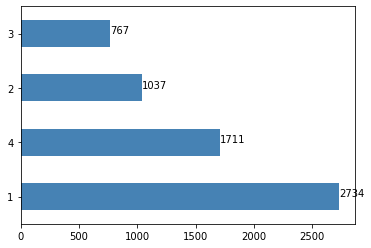

'quarter'

In [41]:
countplot_values('quarter')

we conclude that maximum vehicles are used in quarter 1.

**Month**

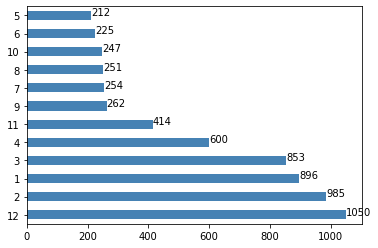

'month'

In [42]:
countplot_values('month')

we conclude that maximum vehicles are used in month 12, 2 and 1(means in summer season of nairobi).

##**Summary**
From all of these plot, as we saw that,

* By Bus, Number of ticket 1 is most frequent with value 699.

* By shuttle, Number of ticket 1 and 11 are most frequent with values 759 and 748 respectively.

* Mpesa is used mostly in Payment mode type, i.e., cash is less prefered by the people who travel to Nairobi.

* Mostly people travel by a bus (i.e. with maximum capacity 49) as compare to shuttle (whose maximum capacity is 11).

* Mostly vehicle are originated from Kisii, Rongo and Kijauri.

* Most prefer time for travel to Nairobi is 7:04 A.M., 7:08 A.M. and 7:06 A.M..

* This dataset contains data of 2 year (i.e. 2017 and 2018).

* we conclude that maximum vehicles are used in quarter 1.

* we conclude that maximum vehicles are used in month 12, 2 and 1(means in summer season of nairobi).

In [43]:
#convert travel time unit into hour.
dataset_new["travel_time"] = dataset_new["travel_time"].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)

In [44]:
dataset_new['travel_time']

0        7.250000
1        7.200000
2        7.083333
3        7.166667
4        7.200000
          ...    
6244    23.166667
6245     7.083333
6246     7.150000
6247     8.000000
6248     5.166667
Name: travel_time, Length: 6249, dtype: float64

In [45]:
#all columns of dataset_new
dataset_new.columns.values

array(['ride_id', 'payment_method', 'travel_date', 'travel_time',
       'travel_from', 'car_type', 'max_capacity', 'number_of_ticket',
       'date', 'day_of_week', 'day_of_year', 'day_of_month', 'hour',
       'minute', 'is_weekend', 'year', 'quarter', 'month'], dtype=object)

In [46]:
#relevent column for histogram
plot_col=['number_of_ticket','travel_time','day_of_month', 'day_of_week',"month"]

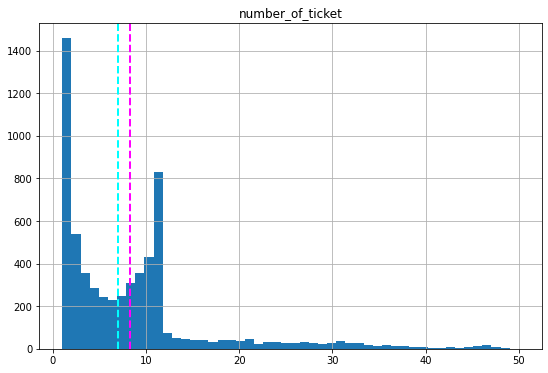

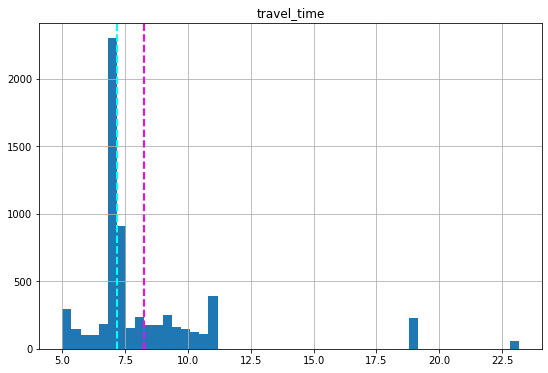

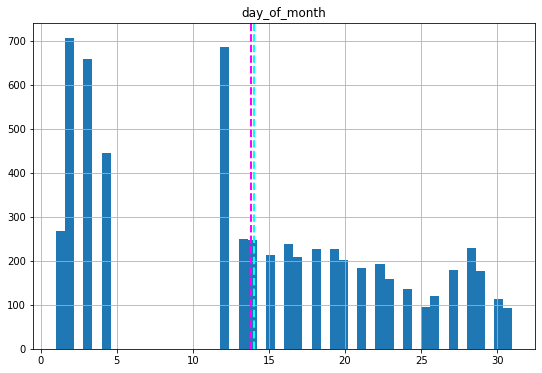

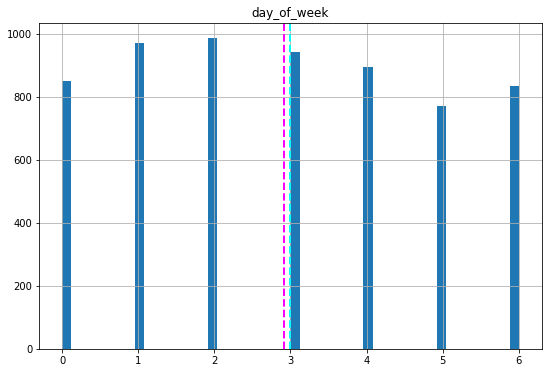

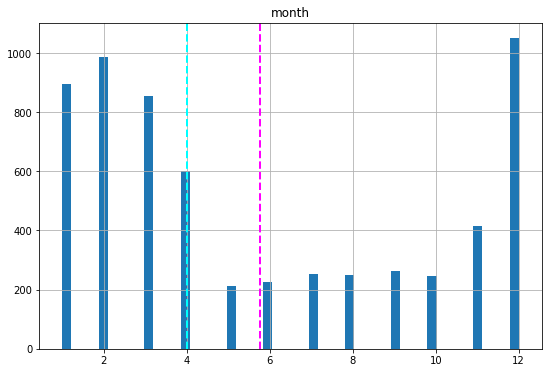

In [47]:
#histogram
for col in plot_col[0:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset_new[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [48]:
numerical_feature = [col for col in dataset_new.describe().columns if col not in ['number_of_ticket'] ]
numerical_feature

['travel_time',
 'day_of_week',
 'day_of_year',
 'day_of_month',
 'hour',
 'minute',
 'is_weekend',
 'year',
 'quarter',
 'month']

## **Summary:**
As we know that, positive skewed, negative skewed and no skewed in the data is determined by mean, median amd mode.

if mean > median > mode then, distribution of the data is positively skewed,

if mean = median = mode then, no skewed that is normally distributed,

otherwise, it is negatively skewed.


There is a positive skewed in number_of_ticket, ticket_time & month, approximately no skewed in day_of_month and negative skewed in day_of_week.


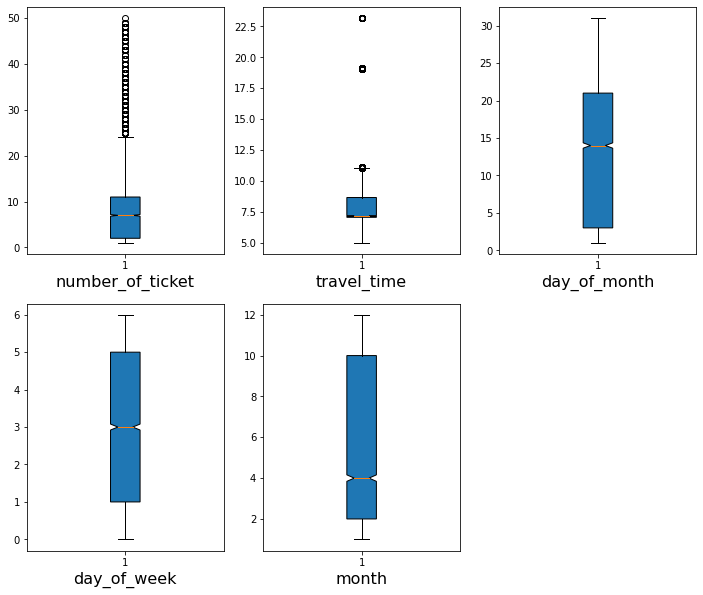

In [49]:
#boxplot
plt.figure(figsize=(12,10))
for x,y in zip(range(1,len(plot_col)+1),plot_col):
    plt.subplot(2,3,x)
    plt.boxplot(dataset_new[y],patch_artist=True,notch=True)
    plt.xlabel(y,fontsize=16)

plt.show()

##**Summary:**
Boxplot gives us 5 point summary which consists of the minimum point, the first quartile, the median, the third quartile, and the maximum point. 

from Boxplot, we have got to know about outliers, as we see that, day_of_month, day_of_week, month have no outlier, but travel_time and number_of_ticket have a lot of outliers. 

In [50]:
dataset_new.describe(include=["object"]).columns.values

array(['ride_id', 'payment_method', 'travel_date', 'travel_from',
       'car_type', 'max_capacity'], dtype=object)

In [51]:
categorical_features=['payment_method','travel_from','car_type']

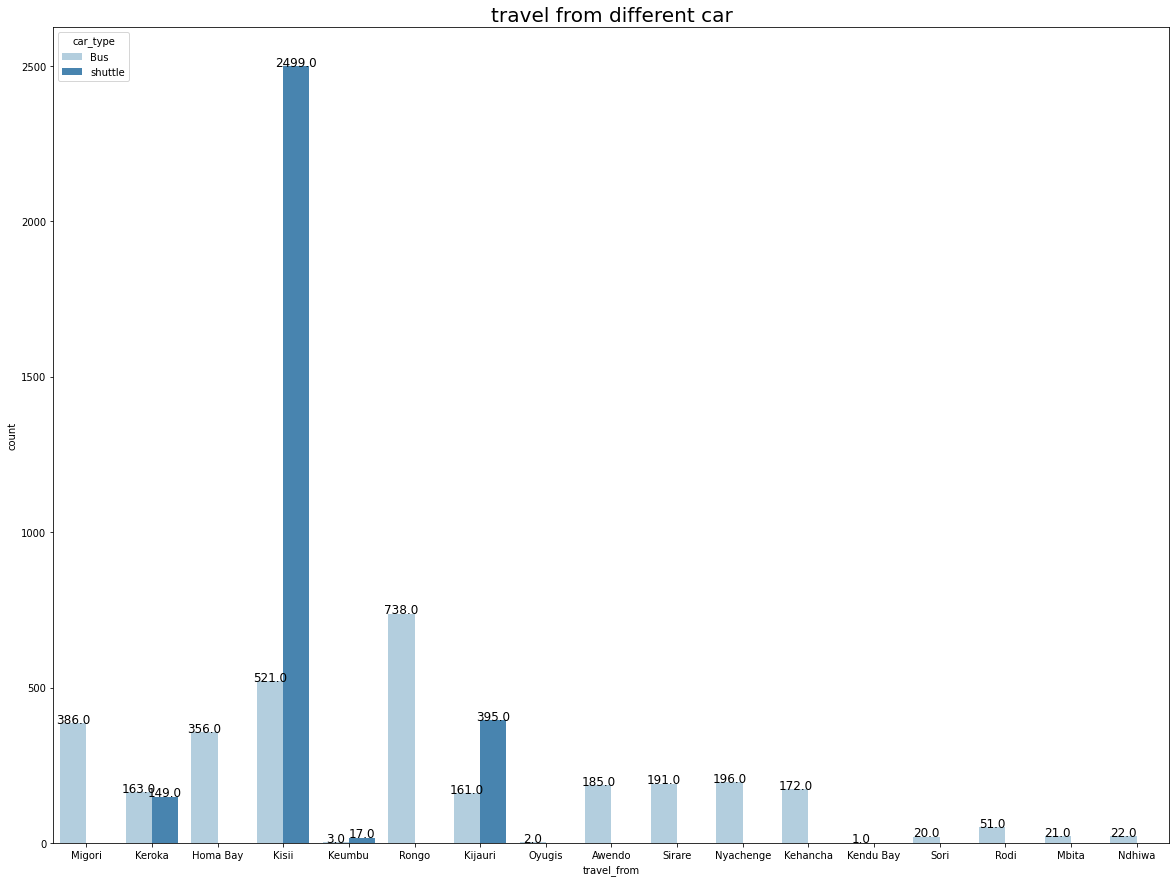

In [52]:
plt.figure(figsize=(20,15))

ax = sns.countplot(dataset_new['travel_from'],hue=dataset_new['car_type'],palette="Blues")

plt.title("travel from different car",size=20)

for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)
    
plt.show()

## **Bivariate Analysis**

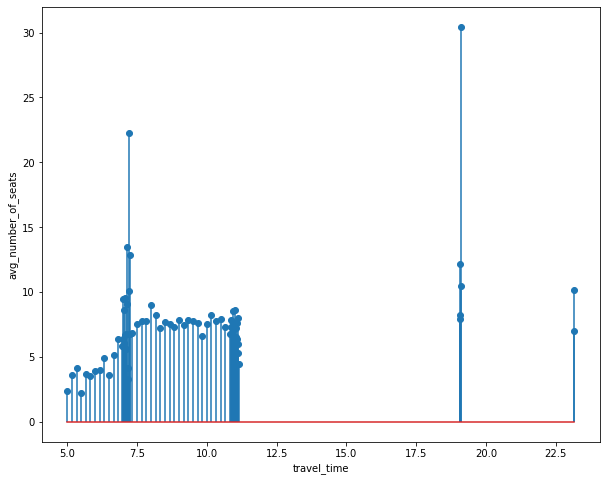

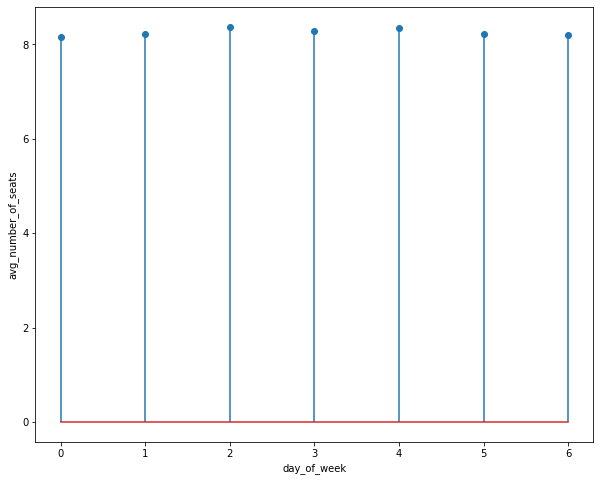

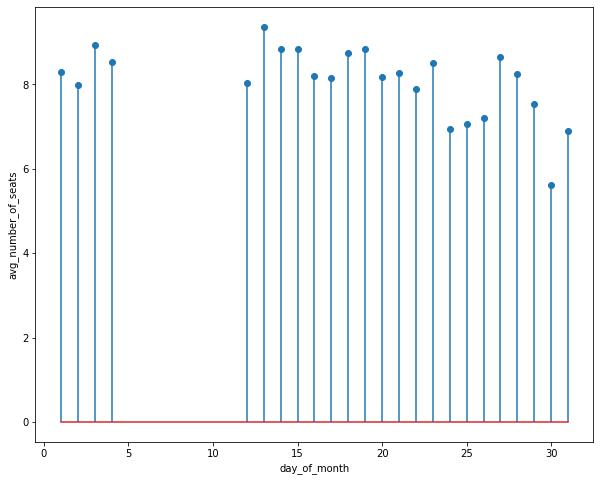

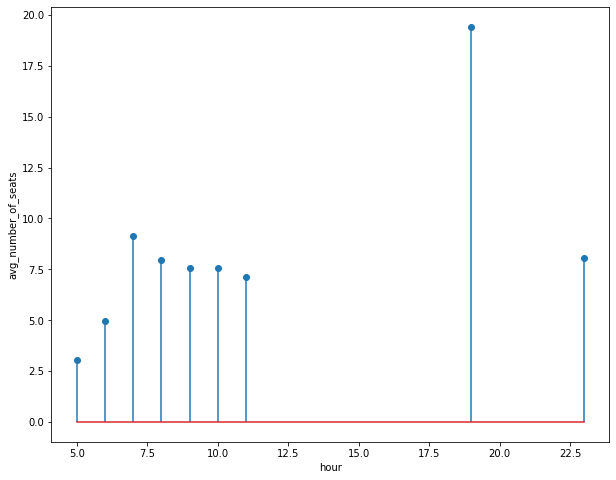

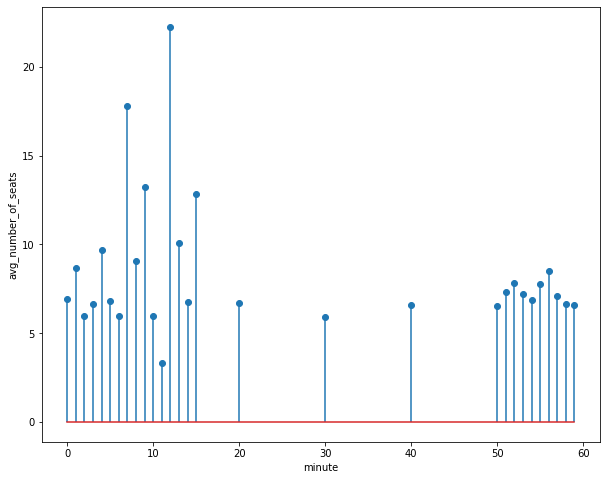

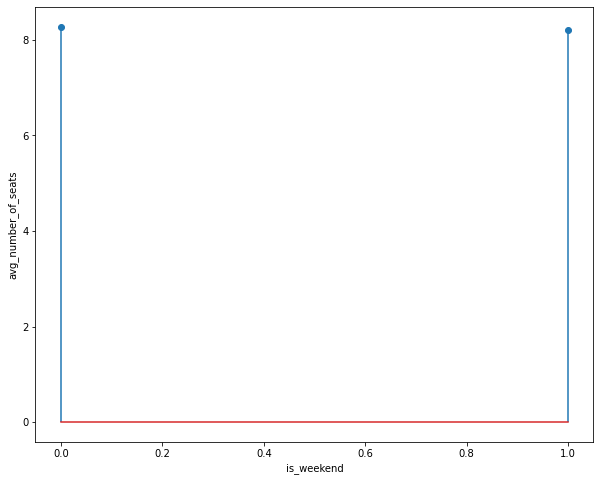

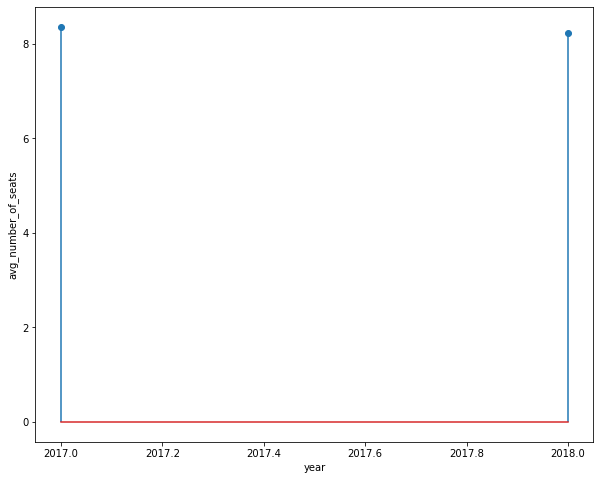

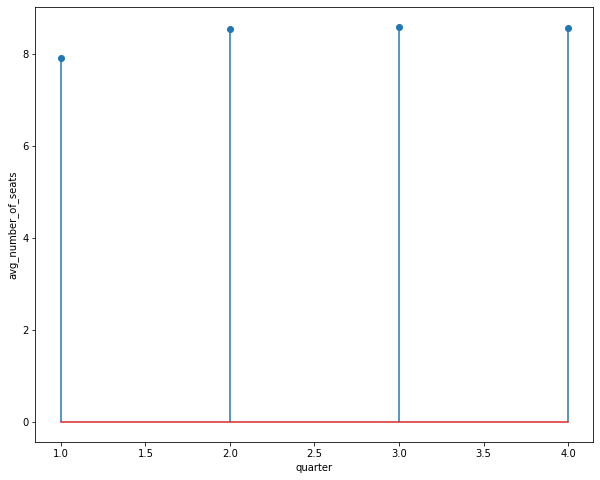

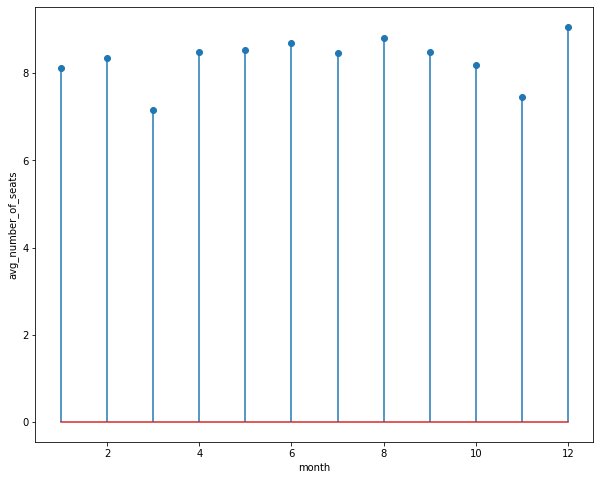

In [53]:
for col in numerical_feature:
  if col != 'day_of_year' and col != 'ride_id':
    dd = dataset_new.groupby([col])['number_of_ticket'].mean()
    dd = dd.reset_index()
    plt.figure(figsize =(10, 8))
    plt.stem(dd[col], dd['number_of_ticket'])
    plt.xlabel(col)
    plt.ylabel('avg_number_of_seats')

plt.show()

In [54]:
#stripplot
def strip_plot(attribute):
  for d,car in zip(datasets,dataset_new["car_type"].unique()):
    plt.figure(figsize=(18, 10))
    sns.stripplot(x=attribute, y="number_of_ticket", data=d)
    plt.xlabel("by " + car,fontsize=16)
  return attribute

'travel_from'

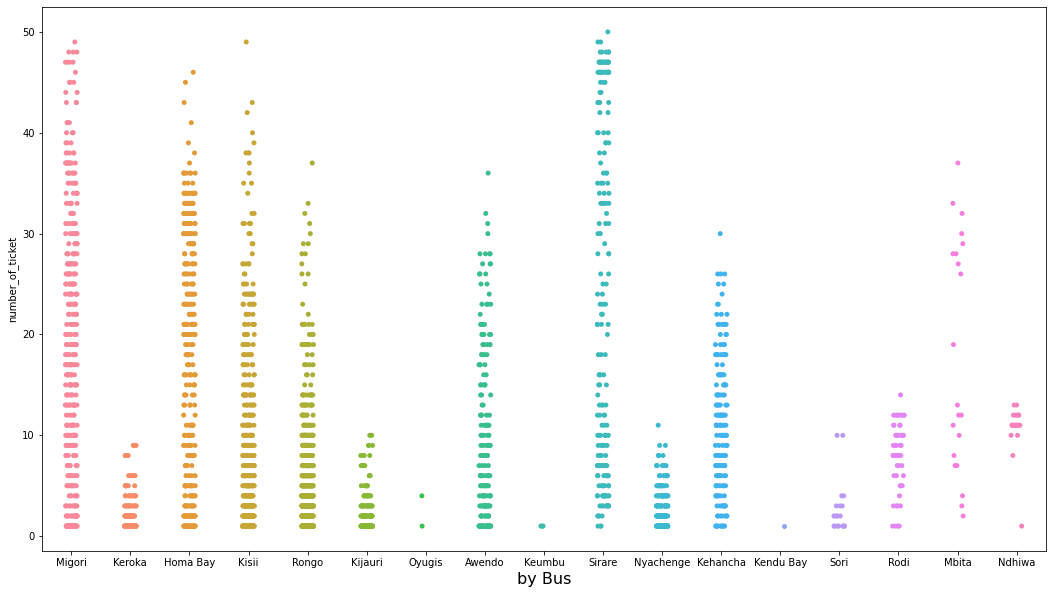

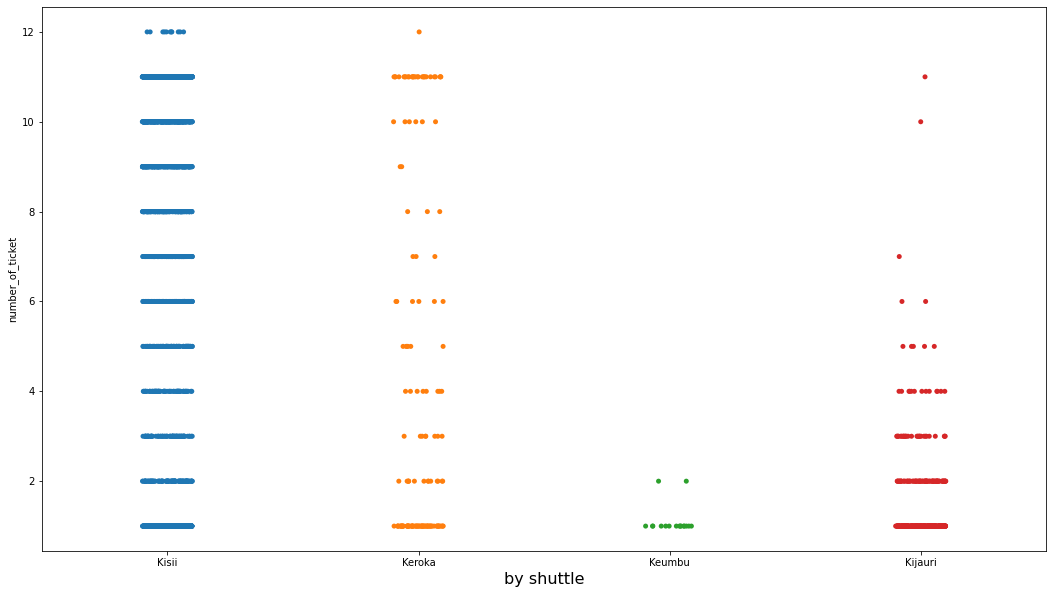

In [55]:
strip_plot("travel_from")

##**Summary:**
from the above stripplot by Bus, we conclude that number of ticket > 40 are mostly sold in Sirare and Migori.

By shuttle, we conclude that each number of ticket is sold in Kisii with almost same frequency and in keumbu town, only number of ticket 1 and 2 is sold. 



'day_of_month'

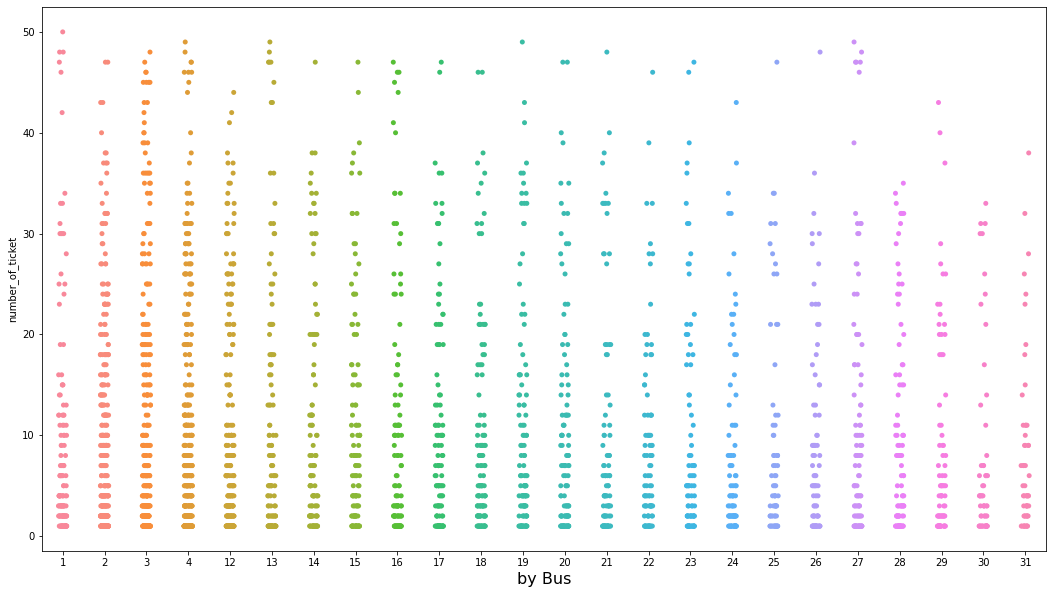

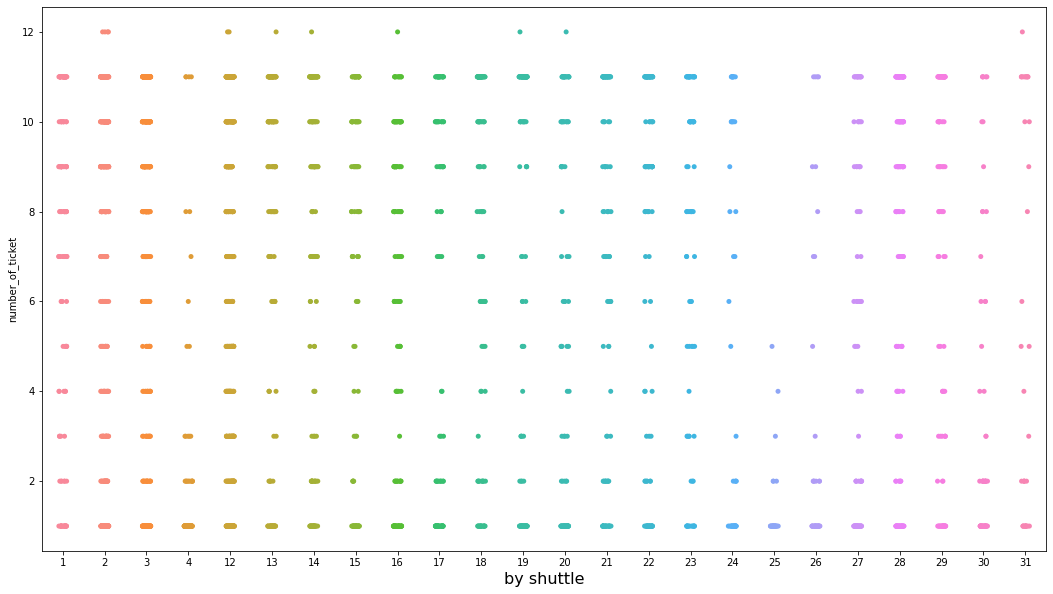

In [56]:
strip_plot("day_of_month")

## **Summary:**
We can see that there is the gap between 4 and 12 day of the month. We can assume that there is official holiday of public transport between these days. 

we can also say that the number of tickets from 1 to 10 in each days of month are almost same. but for number of tickets > 10 in all the days of month, there is some variation.
 

'hour'

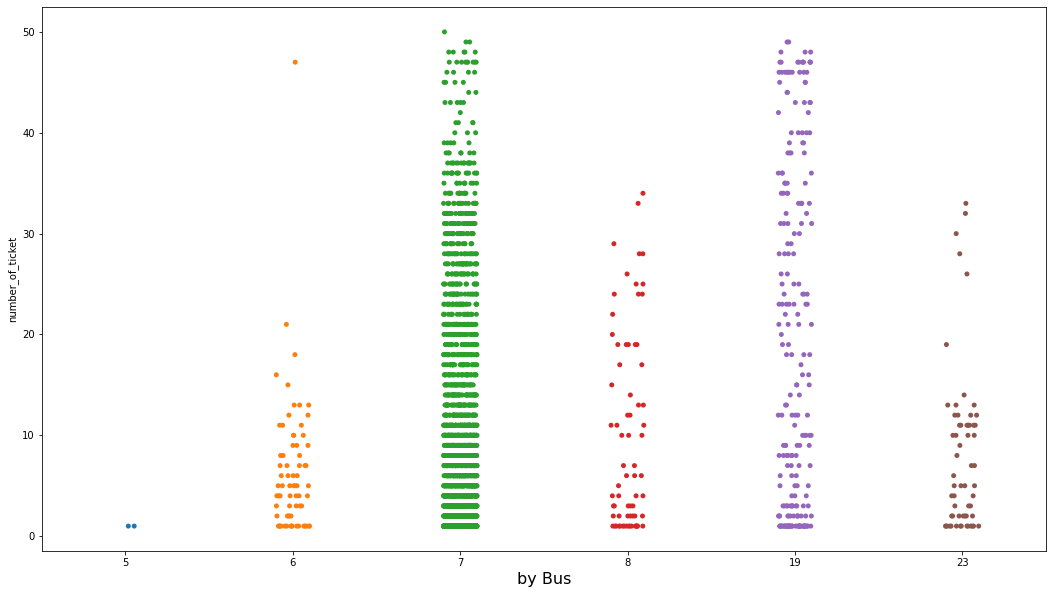

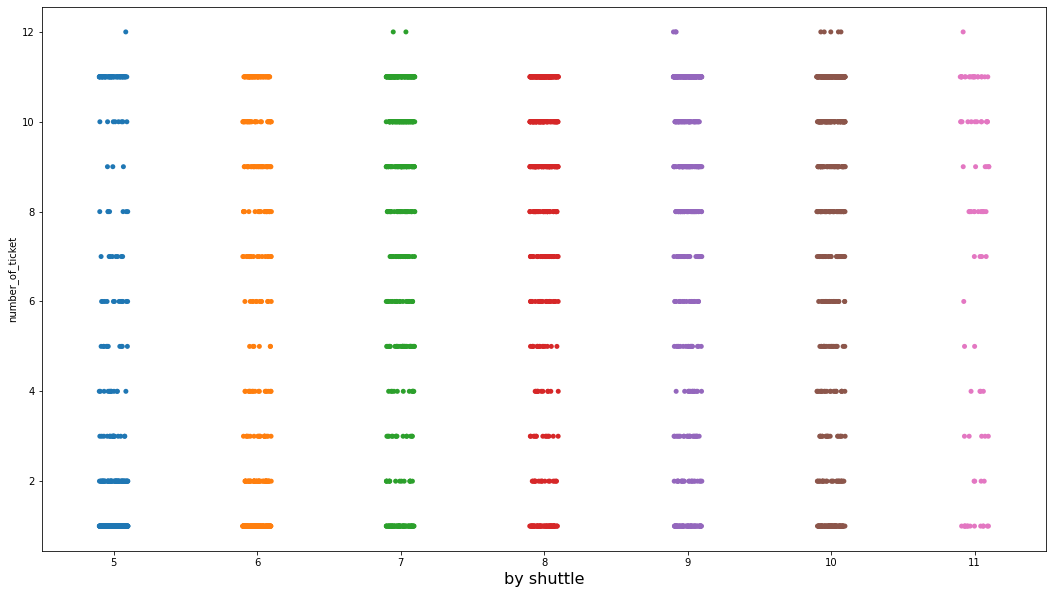

In [57]:
strip_plot("hour")

##**Summary:**
By Bus, 

* We can see that most of the tickets were sold at 7 A.M that seems true because in the morning, most of the people go to the work.

* we can say that there is no ride between 8 A.M. to 7:00 P.M.

By shuttle,

* Tickets were sold with almost same frequency at each time except 11:00.

* There is a rides only between 4:00 A.M. to 12:00 P.M..


'is_weekend'

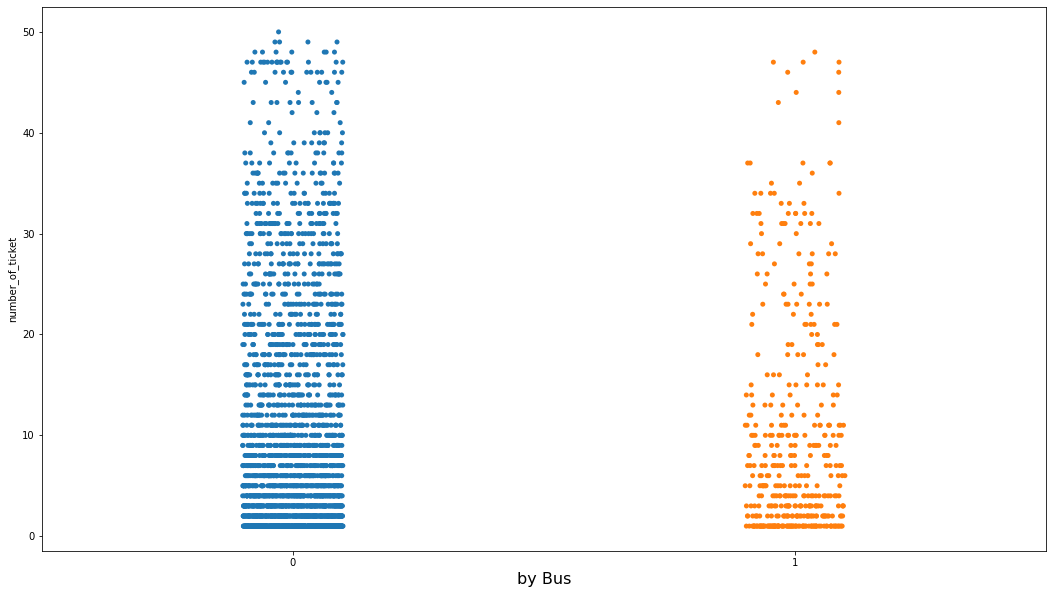

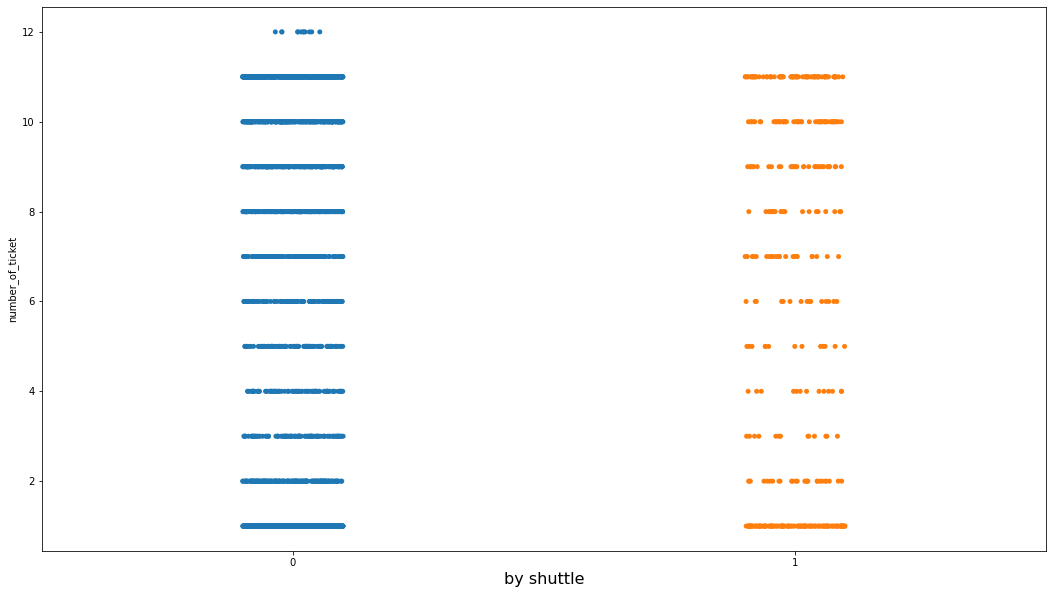

In [58]:
strip_plot("is_weekend")

##**Summary:**

Since, comparison between weekdays and weekends demand is unfair for this data,
because weekdays are 5 and weekends are only 2.

Thus, from the above plot, I conclude that there is no such difference in demand. but we see that, number of ticket more than maximum capacity is only on weekdays. 

<AxesSubplot:xlabel='travel_time', ylabel='travel_from'>

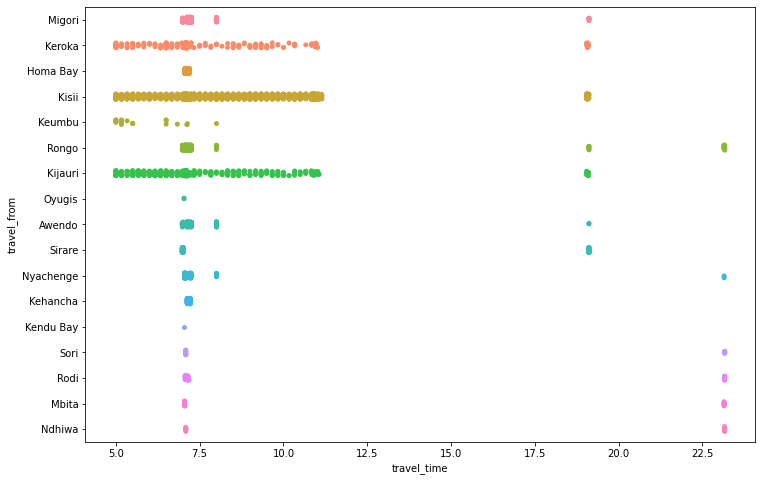

In [59]:
plt.figure(figsize=(12,8))
sns.stripplot(dataset_new["travel_time"],dataset_new["travel_from"])

Above plot is plotted between travel time and travel from and from this, we got to know the timing of car for each town.

## **Encoding Categorical features**

In [60]:
from sklearn import preprocessing #Import LabelEncoder
data = pd.get_dummies(dataset_new, columns=['travel_from'])
label_enc = {'Bus':1,'shuttle':0 ,"Mpesa":1,"Cash":0}
data.replace(label_enc,inplace=True)

<AxesSubplot:>

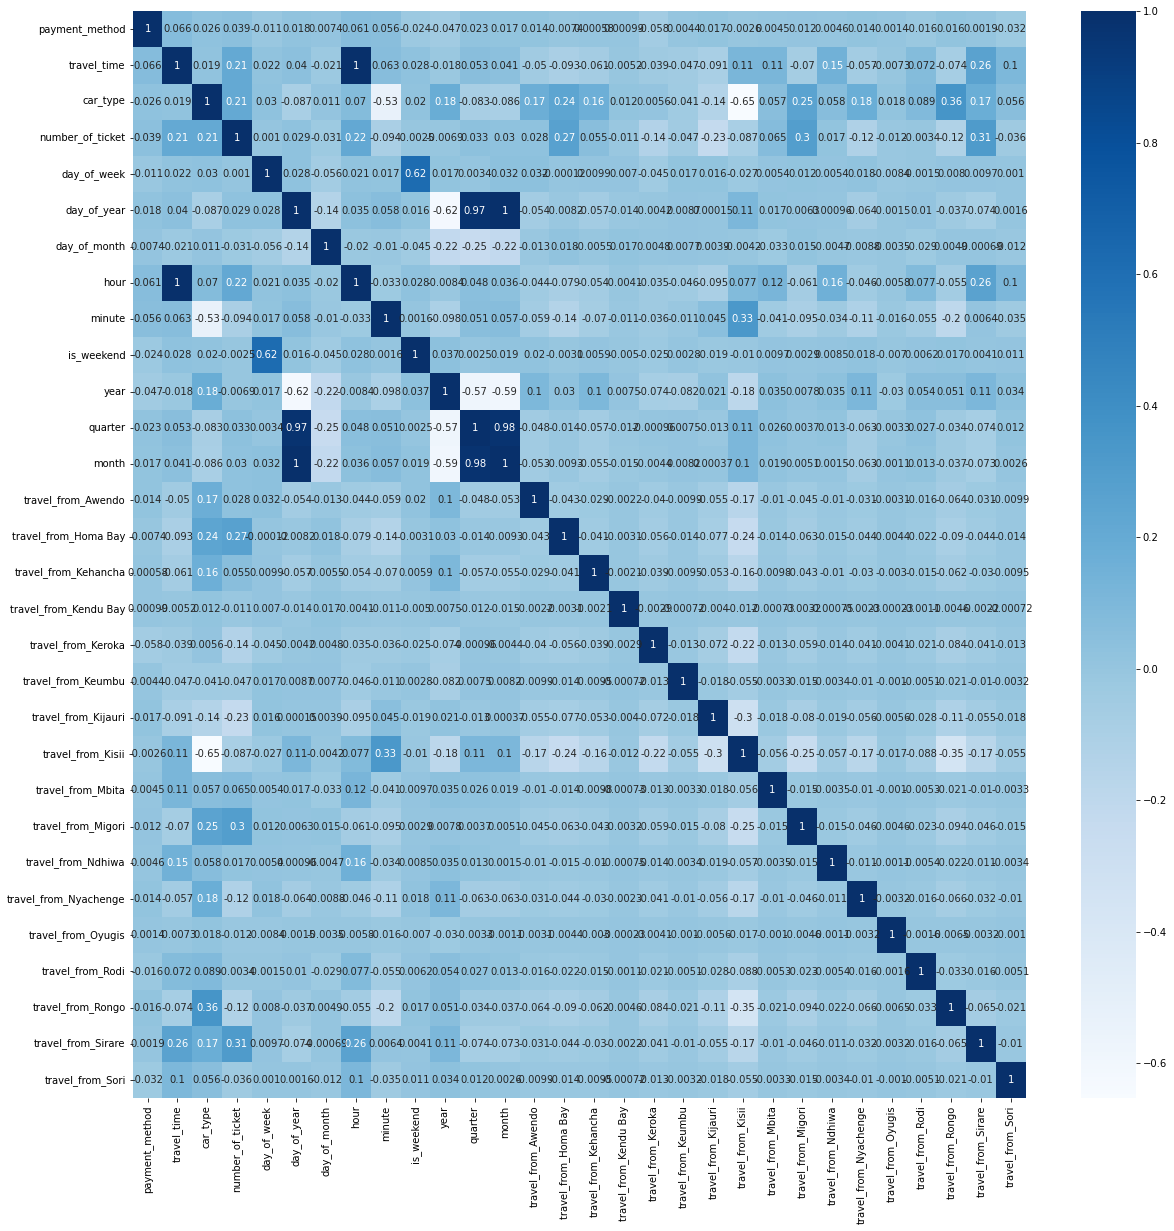

In [61]:
#heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap="Blues")

##**Summary:**
There is a high correlation between 

1) day_of_year & month,

2) day_of_year and quarter,

3) quarter and month.
 

In [62]:
#all numerical feature except target variable
col=set(data.describe().columns.values)-{'number_of_ticket'}

In [63]:
#Multicollinearity by VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [64]:
#call the function
calc_vif(data[[i for i in col if i not in ['hour','minute']]])

,variables,VIF
0,travel_from_Kendu Bay,7.091215e+03
1,travel_from_Kisii,2.140873e+07
2,travel_from_Awendo,1.311703e+06
3,travel_time,1.218199e+00
4,travel_from_Sirare,1.354231e+06
5,travel_from_Mbita,1.489162e+05
6,travel_from_Kehancha,1.219526e+06
7,travel_from_Oyugis,1.416828e+04
8,payment_method,1.020407e+00
9,travel_from_Keumbu,1.417085e+05


In [65]:
calc_vif(data[[i for i in col if i not in ['hour','minute',"travel_from_Kisii","day_of_year","quarter","year","payment_method"]]])

,variables,VIF
0,travel_from_Kendu Bay,1.002138
1,travel_from_Awendo,1.267266
2,travel_time,5.714929
3,travel_from_Sirare,1.321520
4,travel_from_Mbita,1.038625
5,travel_from_Kehancha,1.247110
6,travel_from_Oyugis,1.002845
7,travel_from_Keumbu,1.007668
8,car_type,5.147300
9,travel_from_Nyachenge,1.281745


In [66]:
#required independent features
req_features=calc_vif(data[[i for i in col if i not in ['hour','minute',"travel_from_Kisii","day_of_year","quarter","year","payment_method"]]]).variables.values

In [67]:
#make a new dataframe with independent and dependent features.
dataset_final=data[req_features]
dataset_final['number_of_ticket']=data['number_of_ticket']

In [68]:
#call dataframe
dataset_final.head()

,travel_from_Kendu Bay,travel_from_Awendo,travel_time,travel_from_Sirare,travel_from_Mbita,travel_from_Kehancha,travel_from_Oyugis,travel_from_Keumbu,car_type,travel_from_Nyachenge,...,travel_from_Keroka,day_of_week,travel_from_Ndhiwa,month,travel_from_Migori,travel_from_Rongo,travel_from_Homa Bay,travel_from_Kijauri,day_of_month,number_of_ticket
0,0,0,7.250000,0,0,0,0,0,1,0,...,0,1,0,10,1,0,0,0,17,1
1,0,0,7.200000,0,0,0,0,0,1,0,...,0,6,0,11,1,0,0,0,19,1
2,0,0,7.083333,0,0,0,0,0,1,0,...,1,6,0,11,0,0,0,0,26,1
3,0,0,7.166667,0,0,0,0,0,1,0,...,0,0,0,11,0,0,1,0,27,5
4,0,0,7.200000,0,0,0,0,0,1,0,...,0,0,0,11,1,0,0,0,27,31


In [69]:
#shape
dataset_final.shape

(6249, 23)

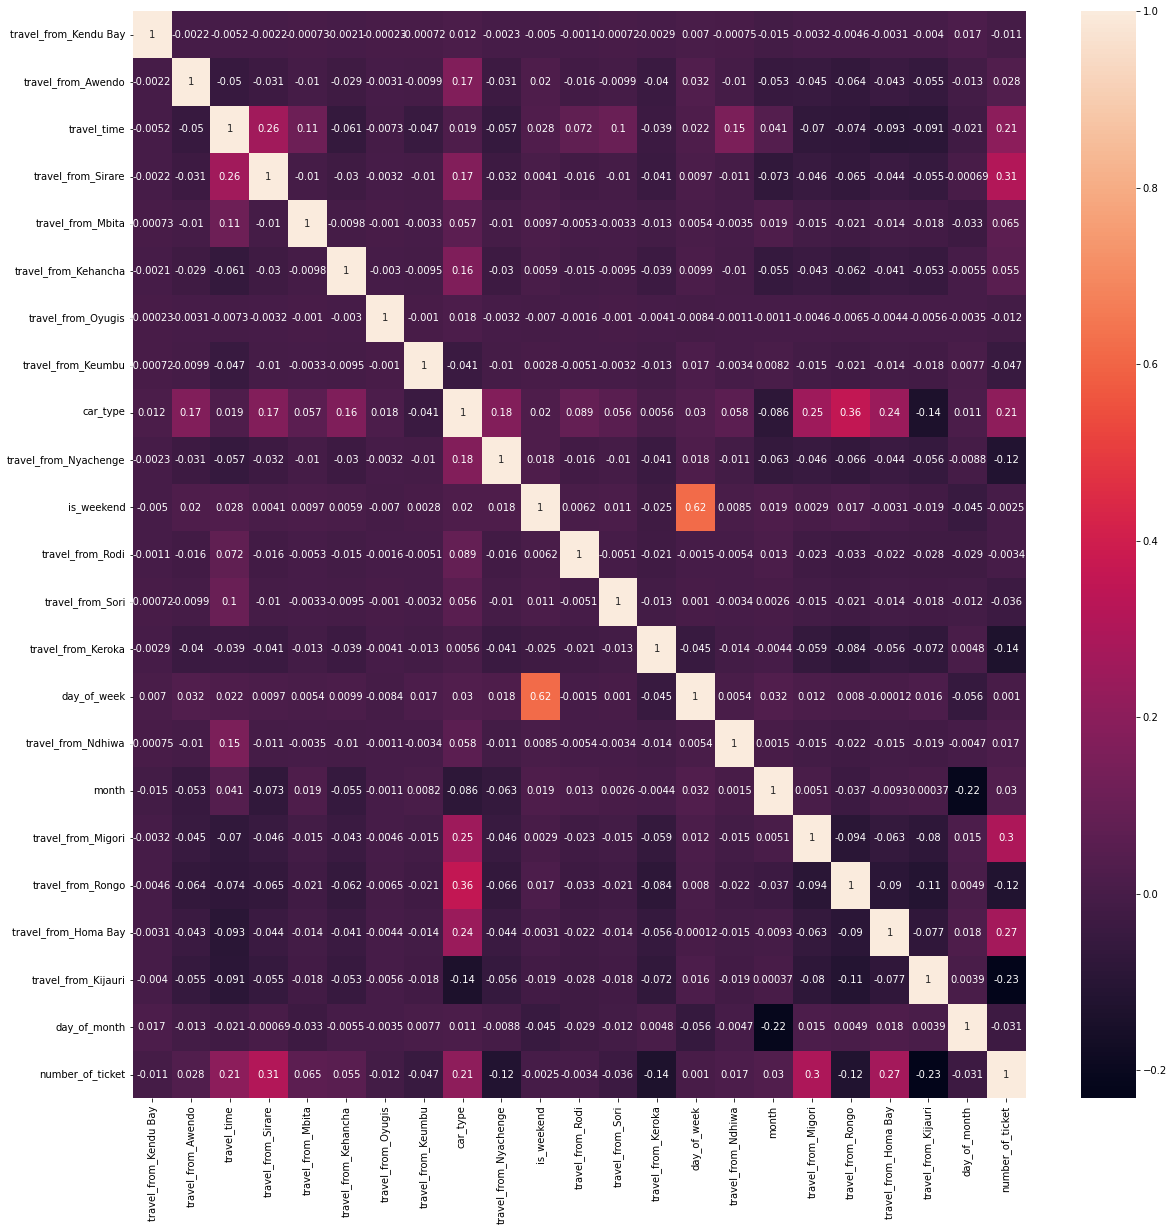

In [70]:
#plot a heatmap to find the remaining correlated features.
plt.figure(figsize=(20,20))
sns.heatmap(dataset_final.corr(),annot=True)
plt.show()

These ia a correlation between

1) day_of_week and is_weekend,

2) car_type and travel_from_Rongo.

Dependent variable has correlation with travel_from_Sirare, travel_from_Migori, travel_from_Homa Bay, car_type, travel_time and travel_from_Kijauri variable.

In [71]:
#remove the correlated features for the dataset
dataset_final.drop(columns=["day_of_week","travel_from_Rongo"],inplace=True)

In [72]:
reg_col=("travel_from_Sirare", "travel_from_Migori", "travel_from_Homa Bay", "car_type", "travel_time" ,"travel_from_Kijauri")

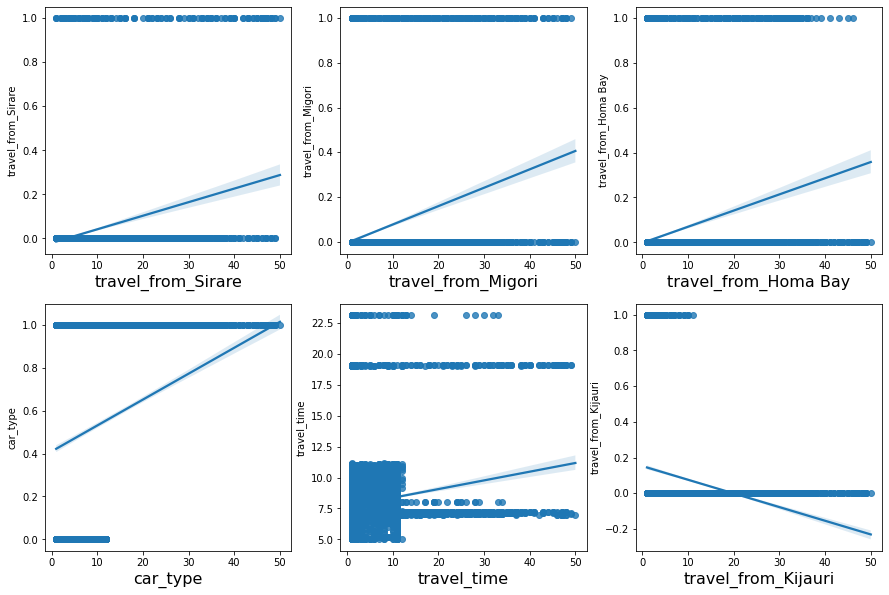

In [73]:
plt.figure(figsize=(15,10))
for x,y in zip(range(1,len(reg_col)+1),reg_col):
    plt.subplot(2,3,x)
    sns.regplot(dataset_final["number_of_ticket"],dataset_final[y])
    plt.xlabel(y,fontsize=16) 
plt.show()

# **Training the models**

In [74]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [75]:
#independent and dependent features
from scipy.stats import zscore  
y=dataset_final["number_of_ticket"]
X=dataset_final.drop(columns=["number_of_ticket"]).apply(zscore) #apply zscore for scaling

In [76]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

# **Linear Regression**

In [77]:
import math
from sklearn.linear_model import LinearRegression

In [78]:
#call the model
model = LinearRegression()
#fitting the model
model.fit(X_train, y_train)
# Prediction
y_pred = model.predict(X_test)

In [79]:
# Model score on Train and Test
train_model_lr = model.score(X_train,y_train)
print('Training Accuracy:',train_model_lr)

test_model_lr = model.score(X_test,y_test)
print('Testing Accuracy:',test_model_lr)

Training Accuracy: 0.36168983697084345
Testing Accuracy: 0.4082310936269763


In [80]:
#define a function which print the result of Evaluation metrics.
def print_metrics(actual, predicted):

  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('r2 is {}'.format(r2_score(actual, predicted)))
  print("adjust_r2 is {}".format(1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [81]:
#call the function
print_metrics(y_test,y_pred)

MSE is 51.632482440544855
RMSE is 7.1855746075414775
r2 is 0.4082310936269763
adjust_r2 is 0.39860100564694334
MAE is 4.866946765771388
MAPE is 148.23508694421312


# **Implementing Lasso Regression**

In [82]:
#model fitting
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [83]:
lasso.score(X_train, y_train)

0.35847638173274166

In [84]:
#Model Prediction
y_pred_lasso = lasso.predict(X_test)

In [85]:
# Model score on Train and Test
train_model_llr = model.score(X_train,y_train)
print('Training Accuracy:',train_model_llr)

test_model_llr = model.score(X_test,y_test)
print('Testing Accuracy:',test_model_llr)

Training Accuracy: 0.36168983697084345
Testing Accuracy: 0.4082310936269763


In [86]:
#Evaluation metrics
print_metrics(y_test,y_pred_lasso)

MSE is 52.260164176610715
RMSE is 7.22911918400926
r2 is 0.4010371235340269
adjust_r2 is 0.39860100564694334
MAE is 4.936835433691826
MAPE is 152.88872110312383


#**Cross Validation for Lasso Regression**

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
### Cross validation and hyperparameter tuning
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [89]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -46.09284032582235


In [90]:
#Model Prediction
y_pred_lasso_cv = lasso_regressor.predict(X_test)

In [91]:
# Model score on Train and Test
train_model_lrh = model.score(X_train,y_train)
print('Training Accuracy:',train_model_lrh)

test_model_lrh = model.score(X_test,y_test)
print('Testing Accuracy:',test_model_lrh)

Training Accuracy: 0.36168983697084345
Testing Accuracy: 0.4082310936269763


In [92]:
#Evaluation metrics
print_metrics(y_test,y_pred_lasso_cv)

MSE is 51.67209293962256
RMSE is 7.18833033044688
r2 is 0.4077771107733126
adjust_r2 is 0.39860100564694334
MAE is 4.872017185574467
MAPE is 148.6086647436349


# **Implementing Ridge Regression**

In [93]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [94]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [95]:
ridge.score(X_train, y_train)

0.3616898367374606

In [96]:
#Model Prediction
y_pred_r = ridge.predict(X_test)

In [97]:
# Model score on Train and Test
train_model_rr = model.score(X_train,y_train)
print('Training Accuracy:',train_model_rr)

test_model_rr = model.score(X_test,y_test)
print('Testing Accuracy:',test_model_rr)

Training Accuracy: 0.36168983697084345
Testing Accuracy: 0.4082310936269763


In [98]:
#Evaluation metrics
print_metrics(y_test,y_pred_r)

MSE is 51.63266691504983
RMSE is 7.18558744397769
r2 is 0.4082289793324294
adjust_r2 is 0.39860100564694334
MAE is 4.866962751410658
MAPE is 148.23613042006164


#**Cross Validation for Ridge Regression**

In [99]:
# Cross validation and Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,2,3,4,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 2, 3, 4, 5, 10, 20, 30, 40, 45, 50,
                                   55, 60, 100]},
             scoring='neg_mean_squared_error')

In [100]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 55}

Using  {'alpha': 55}  the negative mean squared error is:  -46.08591255679878


In [101]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [102]:
# Model score on Train and Test
train_model_rrh = model.score(X_train,y_train)
print('Training Accuracy:',train_model_rrh)

test_model_rrh = model.score(X_test,y_test)
print('Testing Accuracy:',test_model_rrh)

Training Accuracy: 0.36168983697084345
Testing Accuracy: 0.4082310936269763


In [103]:
#Evaluation metrics
print_metrics(y_test,y_pred_ridge)

MSE is 51.73740772127993
RMSE is 7.192872007847765
r2 is 0.4070285266440121
adjust_r2 is 0.39860100564694334
MAE is 4.876217873730962
MAPE is 148.83410553083368


#**Implementing Elastic net Regression**

In [104]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [105]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [106]:
elasticnet.score(X_train, y_train)

0.35837745279439215

In [107]:
y_pred_en = elasticnet.predict(X_test)

In [108]:
# Model score on Train and Test
train_model_en = model.score(X_train,y_train)
print('Training Accuracy:',train_model_en)

test_model_en = model.score(X_test,y_test)
print('Testing Accuracy:',test_model_en)

Training Accuracy: 0.36168983697084345
Testing Accuracy: 0.4082310936269763


In [109]:
#Evaluation metrics
print_metrics(y_test,y_pred_en)

MSE is 52.490786395384745
RMSE is 7.2450525460747865
r2 is 0.398393921972948
adjust_r2 is 0.39860100564694334
MAE is 4.942283975737529
MAPE is 153.20416249340207


#**Running Grid Search Cross Validation for ELastic Net Regression**

In [110]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [111]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [112]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.3}

Using  {'alpha': 0.01, 'l1_ratio': 0.3}  the negative mean squared error is:  -46.26609696793802


In [113]:
# Model score on Train and Test
train_model_enh = model.score(X_train,y_train)
print('Training Accuracy:',train_model_enh)

test_model_enh = model.score(X_test,y_test)
print('Testing Accuracy:',test_model_enh)

Training Accuracy: 0.36168983697084345
Testing Accuracy: 0.4082310936269763


In [114]:
1#Evaluation metrics
print_metrics(y_test,y_pred_elastic)

MSE is 51.71085295945817
RMSE is 7.191025862799978
r2 is 0.40733287541090235
adjust_r2 is 0.39860100564694334
MAE is 4.874383899797208
MAPE is 148.72904952597645


#**Decision Tree**


In [115]:
decision_tree_data = data.copy()

In [116]:
# multicollinearity does not affect Tree based model so we will include distance and time take.
unnecessary_cols = ['ride_id','number_of_ticket','date',"travel_date",'max_capacity']

In [117]:
# creating dependent and independant variable.
x= decision_tree_data.drop(unnecessary_cols, axis=1)
Y= decision_tree_data['number_of_ticket']

In [118]:
#train and test split
X_train1 , X_test1, y_train1, y_test1 = train_test_split(x,Y, test_size= 0.3, random_state=0 )

In [119]:
from sklearn.tree import DecisionTreeRegressor
# fitting decision tree model
tree_model = DecisionTreeRegressor( criterion='squared_error', max_leaf_nodes=30,max_depth= 30,random_state=0)
tree_model.fit(X_train1, y_train1)

DecisionTreeRegressor(max_depth=30, max_leaf_nodes=30, random_state=0)

In [120]:
y_pred_tr = tree_model.predict(X_test1)

In [121]:
# Model score on Train and Test
train_model_tr = tree_model.score(X_train1,y_train1)
print('Training Accuracy:',train_model_tr)

test_model_tr = tree_model.score(X_test1,y_test1)
print('Testing Accuracy:',test_model_tr)


Training Accuracy: 0.5981260930947929
Testing Accuracy: 0.5601000513442159


In [122]:
#Evaluation metrics
print_metrics(y_test1,y_pred_tr)

MSE is 33.21340490988868
RMSE is 5.76310722699905
r2 is 0.5601000513442159
adjust_r2 is 0.39860100564694334
MAE is 3.9720165842701496
MAPE is 137.69552963206084


We can see we are not getting good score so far, Lets try "Ensemble methods"

#**Random Forest**


In [123]:
from sklearn.ensemble import RandomForestRegressor


In [124]:
random_reg = RandomForestRegressor()

In [125]:
random_reg.fit(X_train1,y_train1)

RandomForestRegressor()

In [126]:
y_pred_rf = random_reg.predict(X_test1)

In [127]:
# Model score on Train and Test
train_model_rf = random_reg.score(X_train1,y_train1)
print('Training Accuracy:',train_model_rf)

test_model_rf = random_reg.score(X_test1,y_test1)
print('Testing Accuracy:',test_model_rf)


Training Accuracy: 0.9493529200925127
Testing Accuracy: 0.6562097784091049


In [128]:
#Evaluation metrics
print_metrics(y_test1,y_pred_rf)

MSE is 25.956911039999998
RMSE is 5.0947925414093165
r2 is 0.6562097784091049
adjust_r2 is 0.39860100564694334
MAE is 3.2522453333333328
MAPE is 106.39476115791473


as we saw the accuracy of train and test data, we say that Our model seem to overfit lets do hyperperemeter tuning using GridSearchCV.

# **Random forest Regressor using GridSearchCV**

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
random_grid ={'criterion': ['squared_error'],
 'max_depth':[655,660,670],
 'max_features': ['log2'],
 'min_samples_leaf':[6],
 'min_samples_split': [5],
 'n_estimators': [500,550,650]}

In [131]:
estimator = RandomForestRegressor()
grid = GridSearchCV( estimator=estimator, param_grid =random_grid, cv=3, verbose=1
                               ,n_jobs=-1 )

In [132]:
grid.fit(x,Y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [655, 660, 670], 'max_features': ['log2'],
                         'min_samples_leaf': [6], 'min_samples_split': [5],
                         'n_estimators': [500, 550, 650]},
             verbose=1)

In [133]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 655,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 500}

In [134]:
y_pred_rfh = grid.predict(X_test1)

In [135]:
# Model score on Train and Test
train_model_rfh = grid.score(X_train1,y_train1)
print('Training Accuracy:',train_model_rfh)

test_model_rfh = grid.score(X_test1,y_test1)
print('Testing Accuracy:',test_model_rfh)

Training Accuracy: 0.6542696069766579
Testing Accuracy: 0.6617069744898185


In [136]:
#Evaluation metrics
print_metrics(y_test1,y_pred_rfh)

MSE is 25.541860754461858
RMSE is 5.053895601856241
r2 is 0.6617069744898185
adjust_r2 is 0.39860100564694334
MAE is 3.4176917886352105
MAPE is 120.2208278890289


# **Random Forest Important Features**

In [137]:
# arry of important features
importance = grid.best_estimator_.feature_importances_
importance

array([0.00020886, 0.18611325, 0.02258971, 0.01888337, 0.04802487,
       0.04044692, 0.06573539, 0.10577016, 0.00256876, 0.00654571,
       0.01100977, 0.02620968, 0.00805905, 0.10353909, 0.00646515,
       0.        , 0.02200714, 0.00042623, 0.04634078, 0.0237016 ,
       0.00306102, 0.11065312, 0.00047221, 0.01766708, 0.        ,
       0.00138424, 0.02885179, 0.09237972, 0.00088531])

Text(0.5, 1.0, '10 Most Important features')

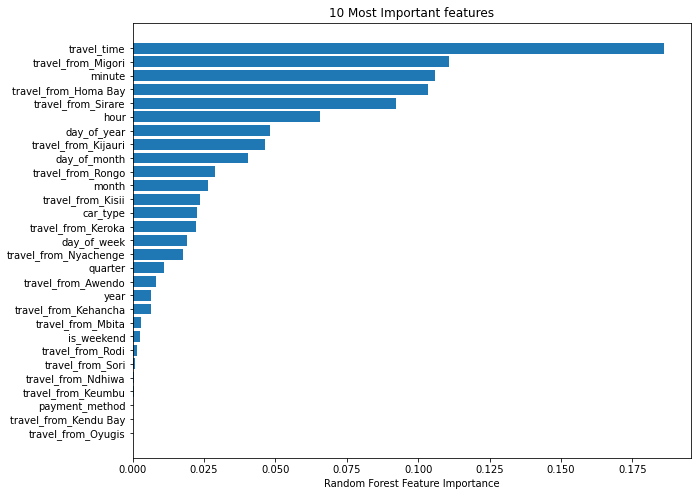

In [138]:
# plotting important features using Xgboost in built function.
plt.figure(figsize=(10,8))
sorted_idx = grid.best_estimator_.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx],importance[sorted_idx])
plt.xlabel('Random Forest Feature Importance')
plt.title('10 Most Important features')

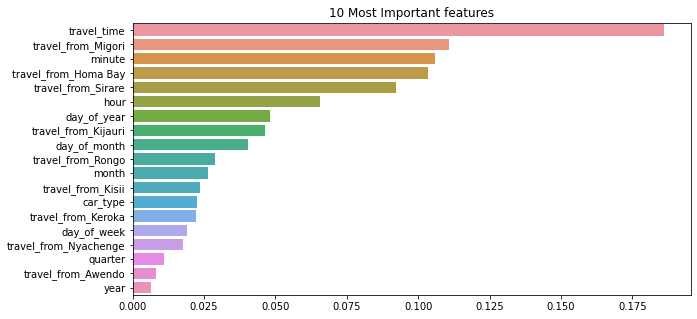

In [139]:
plt.figure(figsize=(10,5))
sns.barplot(y = x.columns[sorted_idx][10:][::-1], x = importance[sorted_idx][10:][::-1] )
plt.title('10 Most Important features')
plt.show()

# **XGboost**

In [140]:
import xgboost as xgb

In [141]:
xgb_reg = xgb.XGBRegressor(
                        booster= 'gbtree',
                        eta= 0.004,
                        learning_rate= 0.1,
                        max_depth= 7,
                        min_child_weight= 10,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        scale_pos_weight= 1,
                        verbosity= 1)

In [142]:
xgb_reg.fit(X_train1,y_train1)

[18:27:40] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.004, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=10, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=1,
             num_parallel_tree=None, objective='reg:linear', ...)

In [143]:
y_pred_xgb = xgb_reg.predict(X_test1)

In [144]:
# Model score on Train and Test
train_model_xgb = xgb_reg.score(X_train1,y_train1)
print('Training Accuracy:',train_model_xgb)

test_model_xgb = xgb_reg.score(X_test1,y_test1)
print('Testing Accuracy:',test_model_xgb)

Training Accuracy: 0.7562477340269409
Testing Accuracy: 0.6193359403613543


In [145]:
#Evaluation metrics
print_metrics(y_test1,y_pred_xgb)

MSE is 28.740966181183737
RMSE is 5.3610601732478
r2 is 0.6193359403613543
adjust_r2 is 0.39860100564694334
MAE is 3.569643855487307
MAPE is 120.27993967007711


# **XGboost using GridSearchCV**

In [146]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [147]:
xgb = xgb.XGBRegressor(random_state= 42, verbosity= 0)

In [148]:
params = {'gamma' : [2, 5, 8],
    'reg_alpha' : [10, 20, 35],
    'colsample_bytree' : [0.5, 1], 
    'max_depth': [7,12,18],
    'n_estimators' : [180]
          }

In [149]:
xgb_grid = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
xgb_grid.fit(x, Y)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             param_grid={'colsample_bytree': [0.5, 1], 'gamma': [2, 5, 8],
                         'max_depth': [7, 12, 18], 'n_estimators': [180],
                         'reg_alpha': [10, 20, 35]},
             verbose=1)

In [150]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'gamma': 2,
 'max_depth': 12,
 'n_estimators': 180,
 'reg_alpha': 35}

In [151]:
xgb_grid.best_estimator_.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.5,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 2,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 12,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 180,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 42,
 'reg_alpha': 35,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': 0}

In [152]:
y_pred_xgbh = xgb_grid.predict(X_test1)

In [153]:
# Model score on Train and Test
train_model_xgh = xgb_grid.score(X_train1,y_train1)
print('Training Accuracy:',train_model_xgh)

test_model_xgh = xgb_grid.score(X_test1,y_test1)
print('Testing Accuracy:',test_model_xgh)

Training Accuracy: 0.8283565990738511
Testing Accuracy: 0.839495371432128


In [154]:
#Evaluation metrics
print_metrics(y_test1,y_pred_xgbh)

MSE is 12.118449285629225
RMSE is 3.481156314449155
r2 is 0.839495371432128
adjust_r2 is 0.39860100564694334
MAE is 2.3904311332990726
MAPE is 77.24765046454941


# **Evaluating all models**

In [155]:
#evaluation metrics for all classifiers
Model = ["Linear Regression","Lasso Regression","Ridge Regression","Decision Tree",'Random Forest','Xgboost']
Train_Accuracy=  [train_model_lr,train_model_lrh, train_model_rrh,train_model_tr, train_model_rf, train_model_xgh]
Test_Accuracy = [test_model_lr,test_model_lrh, test_model_rrh,test_model_tr, test_model_rf, test_model_xgh]

In [156]:
#creating dataframe for all classifiers using dictionary
pd.DataFrame({"Model":Model,"Train Accuracy":Train_Accuracy,'Test Accuracy': Test_Accuracy,
'r2_score':[0.408231,0.407777,0.407028,0.5601,0.661703,0.803554],
'Adjusted r2_score':[0.398601,0.398601,0.398601,0.398601,0.398601,0.398601],
'MSE':[51.632482,51.672078,51.737407,33.213404,25.542140,14.832057],
'RMSE':[7.185574,7.188329,7.192872,5.763107,5.053923,3.851241],
'MAE':[4.866946,4.872014,4.876217,3.972016,3.419740,2.593606],
'MAPE':[148.235086,148.608494,148.834105,137.695529,120.302272,84.909633]})

,Model,Train Accuracy,Test Accuracy,r2_score,Adjusted r2_score,MSE,RMSE,MAE,MAPE
0,Linear Regression,0.361690,0.408231,0.408231,0.398601,51.632482,7.185574,4.866946,148.235086
1,Lasso Regression,0.361690,0.408231,0.407777,0.398601,51.672078,7.188329,4.872014,148.608494
2,Ridge Regression,0.361690,0.408231,0.407028,0.398601,51.737407,7.192872,4.876217,148.834105
3,Decision Tree,0.598126,0.560100,0.560100,0.398601,33.213404,5.763107,3.972016,137.695529
4,Random Forest,0.949353,0.656210,0.661703,0.398601,25.542140,5.053923,3.419740,120.302272
5,Xgboost,0.828357,0.839495,0.803554,0.398601,14.832057,3.851241,2.593606,84.909633


Observation:

1) We can see from above table that Xgboost have highest Training and Testing Accuracy.

2) Xgboost also have best r2 and Adjusted r2 score.

3) It also have minimum MSE, RMSE, MAE and MAPE errors.

4) Hence we can say that Xgboost is the best Model.

# **Conclusion**

1.   **As we have implemented six different models to predict the number of seats that Mobiticket can expect to sell for each ride. Linear Regression, Regularized linear regression (Ridge and Lasso), Decision Tree, Random Forest Regressor and Xgboost Regressor.
Xgboost regression model performed the best among them.**
2.   **Our Model will help Mobiticket and Bus operators to anticipate the number of tickets they can expect to sell for each ride.**